<a href="https://colab.research.google.com/github/hammadkhann/Effective-Dense-Retrieval/blob/main/MS_MARCO_Effective_Dense_Passage_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Pyterrier**

In [1]:
!pip -q install python-terrier
import pyterrier as pt
pt.init()

     |████████████████████████████████| 95 kB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 35.5 MB/s 
     |████████████████████████████████| 69 kB 6.1 MB/s 
     |████████████████████████████████| 222 kB 43.6 MB/s 
     |████████████████████████████████| 6.3 MB 29.0 MB/s 
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 596 kB 43.2 MB/s 
     |████████████████████████████████| 1.8 MB 32.3 MB/s 
     |████████████████████████████████| 294 kB 48.4 MB/s 
     |████████████████████████████████| 126 kB 49.9 MB/s 
     |████████████████████████████████| 291 kB 46.8 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
terrier-assemblies 5.6  jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6  jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
from google.colab import drive
from pyterrier.measures import *

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# **Preparing testing dataset**

In [147]:
br = pt.BatchRetrieve.from_dataset('msmarco_passage', 'terrier_stemmed_text', num_results=100, metadata = ['docno', 'text'], verbose=True)

KeyboardInterrupt: ignored

Exception ignored in: 'jnius.invoke0'
Traceback (most recent call last):
  File "jnius/jnius_proxy.pxi", line 82, in jnius.py_invoke0
  File "<frozen importlib._bootstrap>", line 416, in parent
KeyboardInterrupt


In [148]:
df = pd.DataFrame()
topics = pt.get_dataset('msmarco_passage').get_topics('test-2019')
topics = pt.get_dataset('msmarco_passage').get_qrels('test-2019')[["qid"]].drop_duplicates().merge(topics, on=['qid'])
print(len(topics))
with pt.io.autoopen("test.2019.pckl.gz", 'wb') as f:
  for res in br.transform_gen(topics, batch_size=10):
    df = df.append(res)

43


BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/3 [00:00<?, ?q/s]

In [5]:
trec_2020_df = pd.DataFrame()
topics = pt.get_dataset('msmarco_passage').get_topics('test-2020')
topics = pt.get_dataset('msmarco_passage').get_qrels('test-2020')[["qid"]].drop_duplicates().merge(topics, on=['qid'])
print(len(topics))
with pt.io.autoopen("test.2020.pckl.gz", 'wb') as f:
  for res in br.transform_gen(topics, batch_size=10):
    trec_2020_df = trec_2020_df.append(res)

msmarco-test2020-queries.tsv.gz:   0%|          | 0.00/4.03k [00:00<?, ?iB/s]

2020qrels-docs.txt:   0%|          | 0.00/213k [00:00<?, ?iB/s]

54


BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/4 [00:00<?, ?q/s]

In [6]:
df.shape

(4205, 7)

In [7]:
trec_2020_df.shape

(5329, 7)

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Experiments**

In [9]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git

  Cloning https://github.com/terrierteam/pyterrier_colbert.git to /tmp/pip-req-build-7uoy6ohu
  Running command git clone -q https://github.com/terrierteam/pyterrier_colbert.git /tmp/pip-req-build-7uoy6ohu
  Cloning https://github.com/cmacdonald/ColBERT.git (to revision v0.2) to /tmp/pip-install-t834ceir/colbert_40368bc1034945e4835d1381e29cb8de
  Running command git clone -q https://github.com/cmacdonald/ColBERT.git /tmp/pip-install-t834ceir/colbert_40368bc1034945e4835d1381e29cb8de
  Running command git checkout -b v0.2 --track origin/v0.2
  Switched to a new branch 'v0.2'
  Branch 'v0.2' set up to track remote branch 'v0.2' from 'origin'.
     |████████████████████████████████| 769 kB 5.3 MB/s 
     |████████████████████████████████| 214 kB 46.5 MB/s 
     |████████████████████████████████| 16.9 MB 45 kB/s 
     |████████████████████████████████| 1.2 MB 40.4 MB/s 
     |████████████████████████████████| 895 kB 39.5 MB/s 
     |████████████████████████████████| 3.0 MB 37.3 MB/s 
     |

In [10]:
from pyterrier_colbert.ranking import ColBERTFactory

In [ ]:
# !pip install transformers
# from transformers import BertTokenizerFast, AutoModel

In [11]:
craig_checkpoint= "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"
craig_factory = ColBERTFactory(craig_checkpoint, None, None)
craig_pipeline = pt.transformer.SourceTransformer(df) >>  craig_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")


Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

[Oct 27, 20:55:28] #> Loading model checkpoint.
[Oct 27, 20:55:28] #> Loading checkpoint http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip


Downloading: "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip" to /root/.cache/torch/hub/checkpoints/colbert.dnn.zip


  0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:480: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[Oct 27, 20:56:24] #> checkpoint['epoch'] = 0
[Oct 27, 20:56:24] #> checkpoint['batch'] = 44500


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [16]:
colcondenser_50k_checkpoint="/content/drive/MyDrive/colbert-50000.dnn" 
colcondenser_50k_factory = ColBERTFactory(colcondenser_50k_checkpoint, None, None)
colcondenser_50k_pipeline = pt.transformer.SourceTransformer(df) >>  colcondenser_50k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 27, 20:58:51] #> Loading model checkpoint.
[Oct 27, 20:58:51] #> Loading checkpoint /content/drive/MyDrive/colbert-50000.dnn
[Oct 27, 20:59:05] #> checkpoint['epoch'] = 0
[Oct 27, 20:59:05] #> checkpoint['batch'] = 50000


In [ ]:
colcondenser_40k_checkpoint="/content/drive/MyDrive/colbert-40000.dnn" 
colcondenser_40k_factory = ColBERTFactory(colcondenser_40k_checkpoint, None, None)
colcondenser_40k_pipeline = pt.transformer.SourceTransformer(df) >>  colcondenser_40k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 21, 21:28:29] #> Loading model checkpoint.
[Oct 21, 21:28:29] #> Loading checkpoint /content/drive/MyDrive/colbert-40000.dnn
[Oct 21, 21:29:02] #> checkpoint['epoch'] = 0
[Oct 21, 21:29:02] #> checkpoint['batch'] = 40000


In [ ]:
pt.Experiment(
    [br, colcondenser_6k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH', 'DPH >> ColCondenser_6K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/43 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.502513,0.295957,0.796512
1,DPH >> ColCondenser_6K,0.601750,0.325816,0.862403


In [ ]:
pt.Experiment(
    [br, craig_pipeline, colcondenser_40k_pipeline, colcondenser_50k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH', 'DPH >> Craig_ColBERT', 'DPH >> ColCondenser_40K', 'DPH >> ColCondenser_50K'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/200 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.502513,0.295957,0.796512
1,DPH >> Craig_ColBERT,0.663216,0.343662,0.945736
2,DPH >> ColCondenser_40K,0.656045,0.344960,0.928682
3,DPH >> ColCondenser_50K,0.662346,0.344676,0.933140


# **ColCondenser**

In [12]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://huggingface.co/Luyu/condenser

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 6,521 kB of archives.
After this operation, 14.7 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.0.1 [6,521 kB]
Fetched 6,521 kB in 1s (8,610 kB/s)
debconf: unable to init

In [13]:
import string
import torch
import torch.nn as nn
import numpy as np

from transformers import BertPreTrainedModel, BertModel, BertTokenizerFast
from colbert.parameters import DEVICE
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel


class ColBERT(BertPreTrainedModel):
    def __init__(self, config, query_maxlen, doc_maxlen, mask_punctuation, dim=128, similarity_metric='cosine'):

        super(ColBERT, self).__init__(config)

        self.query_maxlen = query_maxlen
        self.doc_maxlen = doc_maxlen
        self.similarity_metric = similarity_metric
        self.dim = dim

        self.mask_punctuation = mask_punctuation
        self.skiplist = {}

        if self.mask_punctuation:
            self.tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

            self.skiplist = {w: True
                             for symbol in string.punctuation
                             for w in [symbol, self.tokenizer.encode(symbol, add_special_tokens=False)[0]]}

        self.bert = AutoModel.from_pretrained('/content/condenser')
        self.linear = nn.Linear(config.hidden_size, dim, bias=False)

        self.init_weights()

    def forward(self, Q, D):
        return self.score(self.query(*Q), self.doc(*D))

    @staticmethod
    def tensor_intersect(Q, D):
        return len(np.intersect1d(Q.cpu().detach().numpy(), D.cpu().detach().numpy()))

    def query(self, input_ids, attention_mask):
        input_ids, attention_mask = input_ids.to(DEVICE), attention_mask.to(DEVICE)
        Q = self.bert(input_ids, attention_mask=attention_mask)[0]
        Q = self.linear(Q)
        return torch.nn.functional.normalize(Q, p=2, dim=2)

    def doc(self, input_ids, attention_mask, keep_dims=True):
        input_ids, attention_mask = input_ids.to(DEVICE), attention_mask.to(DEVICE)
        D = self.bert(input_ids, attention_mask=attention_mask)[0]
        D = self.linear(D)

        mask = torch.tensor(self.mask(input_ids), device=DEVICE).unsqueeze(2).float()
        D = D * mask

        D = torch.nn.functional.normalize(D, p=2, dim=2)

        if not keep_dims:
            D, mask = D.cpu().to(dtype=torch.float16), mask.cpu().bool().squeeze(-1)
            D = [d[mask[idx]] for idx, d in enumerate(D)]

        return D

    def score(self, Q, D):
        if self.similarity_metric == 'cosine':
            return (Q @ D.permute(0, 2, 1)).max(2).values.sum(1)  # torch size 32

        assert self.similarity_metric == 'l2'
        return (-1.0 * ((Q.unsqueeze(2) - D.unsqueeze(1)) ** 2).sum(-1)).max(-1).values.sum(-1)

    def mask(self, input_ids):
        mask = [[(x not in self.skiplist) and (x != 0) for x in d] for d in input_ids.cpu().tolist()]
        return mask


In [14]:
import os
import ujson
import torch
import random

from collections import defaultdict, OrderedDict

from colbert.parameters import DEVICE
import colbert.utils.utils
from colbert.utils.utils import print_message


def _load_checkpoint(path, model, optimizer=None, do_print=True):
    if do_print:
        print_message("#> Loading checkpoint", path)

    checkpoint = torch.load(path, map_location='cpu')

    state_dict = checkpoint['model_state_dict']
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k
        if k[:7] == 'module.':
            name = k[7:]
        new_state_dict[name] = v

    checkpoint['model_state_dict'] = new_state_dict

    model.load_state_dict(checkpoint['model_state_dict'], strict=False)

    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'], strict=False)

    if do_print:
        print_message("#> checkpoint['epoch'] =", checkpoint['epoch'])
        print_message("#> checkpoint['batch'] =", checkpoint['batch'])

    return checkpoint

colbert.utils.utils.load_checkpoint = _load_checkpoint
colbert.utils.utils.load_checkpoint.__globals__['load_checkpoint'] = _load_checkpoint
from colbert.modeling.colbert import ColBERT

def _load_model(args, do_print=True):
    colbert = ColBERT.from_pretrained('/content/condenser/',
                                      query_maxlen=args.query_maxlen,
                                      doc_maxlen=args.doc_maxlen,
                                      dim=args.dim,
                                      similarity_metric=args.similarity,
                                      mask_punctuation=args.mask_punctuation)
    colbert = colbert.to(DEVICE)

    print_message("#> Loading model checkpoint.", condition=do_print)

    checkpoint = load_checkpoint(args.checkpoint, colbert, do_print=do_print)

    colbert.eval()

    return colbert, checkpoint

In [15]:
import colbert.evaluation.load_model
import pyterrier_colbert.ranking
import colbert.modeling.colbert
colbert.evaluation.load_model.load_model = _load_model
pyterrier_colbert.ranking.load_model = _load_model
colbert.modeling.colbert.ColBERT = ColBERT

# **TREC 2019 Experiment**

In [15]:
baseline_checkpoint="/content/drive/MyDrive/colbert-600.dnn" 
baseline_factory = ColBERTFactory(baseline_checkpoint, None, None)
baseline_pipeline = pt.transformer.SourceTransformer(df) >>  baseline_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")


KeyboardInterrupt: ignored

In [ ]:
mtl_cls_checkpoint="/content/drive/MyDrive/cls__mtl_colbert-600.dnn" 
mtl_cls_factory = ColBERTFactory(mtl_cls_checkpoint, None, None)
mtl_cls_pipeline = pt.transformer.SourceTransformer(df) >>  mtl_cls_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 24, 21:46:43] #> Loading model checkpoint.
[Oct 24, 21:46:43] #> Loading checkpoint /content/drive/MyDrive/cls__mtl_colbert-600.dnn
[Oct 24, 21:47:15] #> checkpoint['epoch'] = 0
[Oct 24, 21:47:15] #> checkpoint['batch'] = 600


In [13]:
ColCoCondenser_checkpoint="/content/drive/MyDrive/ColCoCondenser-600.dnn" 
ColCoCondenser_factory = ColBERTFactory(ColCoCondenser_checkpoint, None, None)
ColCoCondenser_pipeline = pt.transformer.SourceTransformer(df) >>  ColCoCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 25, 12:42:08] #> Loading model checkpoint.
[Oct 25, 12:42:08] #> Loading checkpoint /content/drive/MyDrive/ColCoCondenser-600.dnn
[Oct 25, 12:42:41] #> checkpoint['epoch'] = 0
[Oct 25, 12:42:41] #> checkpoint['batch'] = 600


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
mtl_checkpoint="/content/drive/MyDrive/mtl_colbert-600.dnn" 
mtl_factory = ColBERTFactory(mtl_checkpoint, None, None)
mtl_pipeline = pt.transformer.SourceTransformer(df) >>  mtl_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 24, 21:43:23] #> Loading model checkpoint.
[Oct 24, 21:43:23] #> Loading checkpoint /content/drive/MyDrive/mtl_colbert-600.dnn


In [ ]:
colCondenser_checkpoint="/content/drive/MyDrive/colCondenser-600.dnn" 
colCondenser_factory = ColBERTFactory(colCondenser_checkpoint, None, None)
colCondenser_pipeline = pt.transformer.SourceTransformer(df) >>  colCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 19, 20:34:08] #> Loading model checkpoint.
[Oct 19, 20:34:08] #> Loading checkpoint /content/drive/MyDrive/colCondenser-600.dnn
[Oct 19, 20:34:41] #> checkpoint['epoch'] = 0
[Oct 19, 20:34:41] #> checkpoint['batch'] = 600


In [13]:
cls_only_baseline_checkpoint="/content/drive/MyDrive/cls_only_ft_colbert-600.dnn"#cls_baseline_colbert-600.dnn" 
cls_only_baseline_factory = ColBERTFactory(cls_only_baseline_checkpoint, None, None)
cls_only_baseline_pipeline = pt.transformer.SourceTransformer(df) >>  cls_only_baseline_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 27, 14:56:52] #> Loading model checkpoint.
[Oct 27, 14:56:52] #> Loading checkpoint /content/drive/MyDrive/cls_only_ft_colbert-600.dnn
[Oct 27, 14:57:23] #> checkpoint['epoch'] = 0
[Oct 27, 14:57:23] #> checkpoint['batch'] = 600


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
common_token_checkpoint="/content/drive/MyDrive/common_token_colbert-600.dnn" 
common_token_factory = ColBERTFactory(common_token_checkpoint, None, None)
common_token_pipeline = pt.transformer.SourceTransformer(df) >>  common_token_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model fr

[Oct 16, 19:10:39] #> Loading model checkpoint.
[Oct 16, 19:10:39] #> Loading checkpoint /content/drive/MyDrive/common_token_colbert-600.dnn
[Oct 16, 19:11:21] #> checkpoint['epoch'] = 0
[Oct 16, 19:11:21] #> checkpoint['batch'] = 600


In [ ]:
cls_checkpoint="/content/drive/MyDrive/CLS_1_5_colbert-600.dnn" 
cls_factory = ColBERTFactory(cls_checkpoint, None, None)
cls_pipeline = pt.transformer.SourceTransformer(df) >>  cls_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model fr

[Oct 16, 19:11:27] #> Loading model checkpoint.
[Oct 16, 19:11:27] #> Loading checkpoint /content/drive/MyDrive/CLS_1_5_colbert-600.dnn
[Oct 16, 19:11:56] #> checkpoint['epoch'] = 0
[Oct 16, 19:11:56] #> checkpoint['batch'] = 600


In [ ]:
pt.Experiment(
    [ColCoCondenser_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCoCondenser'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

In [14]:
pt.Experiment(
    [cls_only_baseline_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> cls_only_baseline'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> cls_only_baseline,0.40086,0.242422,0.711462


In [17]:
pt.Experiment(
    [mtl_cls_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> MTL_CLS_ColBERT'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> MTL_CLS_ColBERT,0.465012,0.269747,0.769767


In [ ]:
pt.Experiment(
    [baseline_pipeline, cls_only_baseline_pipeline, mtl_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> baseline_ColBERT', 'DPH >> cls_only_baseline_ColBERT', 'DPH >> MTL_ColBERT'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> baseline_ColBERT,0.543076,0.310284,0.835078
1,DPH >> cls_only_baseline_ColBERT,0.433150,0.265859,0.732558
2,DPH >> MTL_ColBERT,0.308773,0.234836,0.527067


In [ ]:
pt.Experiment(
    [br, cls_only_baseline_pipeline, cls_pipeline, baseline_pipeline, common_token_pipeline, colCondenser_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH', 'DPH >> cls_only_baseline_ColBERT', 'DPH >> cls_token_1_5_ColBERT', 'DPH >> baseline_ColBERT', 'DPH >> token_overlap_ColBERT', 'DPH >> ColCondenser'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/43 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.502513,0.295957,0.796512
1,DPH >> cls_only_baseline_ColBERT,0.433150,0.265859,0.732558
2,DPH >> cls_token_1_5_ColBERT,0.542058,0.310970,0.836822
3,DPH >> baseline_ColBERT,0.543076,0.310284,0.835078
4,DPH >> token_overlap_ColBERT,0.552630,0.314484,0.862403
5,DPH >> ColCondenser,0.605914,0.323573,0.893411


# **TREC 2020 Experiment**

In [ ]:
# colCondenser_factory = ColBERTFactory(colCondenser_checkpoint, None, None)
colCondenser_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  colCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 16, 21:12:39] #> Loading model checkpoint.
[Oct 16, 21:12:39] #> Loading checkpoint /content/drive/MyDrive/colCondenser-600.dnn
[Oct 16, 21:13:12] #> checkpoint['epoch'] = 0
[Oct 16, 21:13:12] #> checkpoint['batch'] = 600


In [ ]:
baseline_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  baseline_factory.text_scorer()

In [ ]:
cls_only_baseline_pipeline_trec_2020 =  pt.transformer.SourceTransformer(trec_2020_df) >>  cls_only_baseline_factory.text_scorer()

In [ ]:
common_token_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  common_token_factory.text_scorer()

In [ ]:
cls_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  cls_factory.text_scorer()

In [ ]:
pt.Experiment(
    [br, baseline_pipeline_trec_2020 , cls_only_baseline_pipeline_trec_2020, cls_pipeline_trec_2020, common_token_pipeline_trec_2020, colCondenser_pipeline_trec_2020], 
    pt.get_dataset('msmarco_passage').get_topics('test-2020'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2020'),
    filter_by_qrels=True,
    names=['DPH','DPH >> baseline_ColBERT', 'DPH >> cls_only_baseline_ColBERT', 'DPH >> cls_token_1_5_ColBERT', 'DPH >> token_overlap_ColBERT', 'DPH >> ColCondenser'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/54 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.450545,0.284943,0.787831
1,DPH >> baseline_ColBERT,0.548498,0.324521,0.864969
2,DPH >> cls_only_baseline_ColBERT,0.386177,0.247103,0.766049
3,DPH >> cls_token_1_5_ColBERT,0.543929,0.323473,0.864374
4,DPH >> token_overlap_ColBERT,0.552185,0.324053,0.865300
5,DPH >> ColCondenser,0.556547,0.320949,0.884259


# **Token overlap only Experiment**

In [ ]:
  def tensor_intersect(Q, D):
      return len(np.intersect1d(Q, D))

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_overlap_pipeline = br >> pt.apply.doc_score(lambda row: tensor_intersect(tokenizer(row["query"]).input_ids, tokenizer(row["text"]).input_ids))

In [ ]:
pt.Experiment(
    [token_overlap_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> token_overlap'],
    eval_metrics=[nDCG@10, AP, RR]
)

BR(DPH):   0%|          | 0/200 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR
0,DPH >> token_overlap,0.428046,0.262711,0.748532


# **ColCondenser Query Pruning Experiment**

In [29]:
  def slow_rerank_with_qembs(args, qembs, pids, passages, gpu=True):
      colbert = args.colbert
      inference = args.inference

      # make to 3d tensor
      Q = torch.unsqueeze(qembs, 0)
      if gpu:
          Q = Q.cuda()
     
      D_ = inference.docFromText(passages, bsize=args.bsize)
      if gpu:
        D_ = D_.cuda()

      scores = (Q @ D_.permute(0, 2, 1)).max(2).values.sum(1)

      scores = scores.sort(descending=True)
      ranked = scores.indices.tolist()

      ranked_scores = scores.values.tolist()
      ranked_pids = [pids[position] for position in ranked]
      ranked_passages = [passages[position] for position in ranked]

      # assert len(ranked_pids) == len(set(ranked_pids))
      return list(zip(ranked_scores, ranked_pids, ranked_passages))

In [132]:
from pyterrier.transformer import TransformerBase
def text_scorer(self, query_encoded=False, doc_attr="text", verbose=False) -> TransformerBase:
    """
    Returns a transformer that uses ColBERT model to score the *text* of documents.
    """
    #input: qid, query, docno, text
    #OR
    #input: qid, query, query_embs, query_toks, query_weights, docno, text

    #output: qid, query, docno, score

    def _text_scorer(queries_and_docs):
        groupby = queries_and_docs.groupby("qid")
        rtr=[]
        with torch.no_grad():
            for qid, group in tqdm(groupby, total=len(groupby), unit="q") if verbose else groupby:
                query = group["query"].values[0]
                ranking = slow_rerank(self.args, query, group["docno"].values, group[doc_attr].values.tolist())
                for rank, (score, pid, passage) in enumerate(ranking):
                        rtr.append([qid, query, pid, score, rank])          
        return pd.DataFrame(rtr, columns=["qid", "query", "docno", "score", "rank"])

    # when query is encoded 
    def _text_scorer_qembs(queries_and_docs):
        groupby = queries_and_docs.groupby("qid")
        rtr=[]
        with torch.no_grad():
            for qid, group in tqdm(groupby, total=len(groupby), unit="q") if verbose else groupby:
                qembs = group["query_embs"].values[0]
                query = group["query"].values[0]
                ranking = slow_rerank_with_qembs(self.args, qembs, group["docno"].values, group[doc_attr].values.tolist())
                for rank, (score, pid, passage) in enumerate(ranking):
                        rtr.append([qid, query, pid, score, rank])          
        return pd.DataFrame(rtr, columns=["qid", "query", "docno", "score", "rank"])

    return pt.apply.generic(_text_scorer_qembs if query_encoded else _text_scorer)

In [133]:
import pyterrier_colbert.ranking
import pyterrier_colbert.pruning
colcondenser_50k_factory.text_scorer = text_scorer
colcondenser_50k_factory.text_scorer.__globals__['text_scorer'] = text_scorer

In [ ]:
colCondenser_no_pruning = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=False, CLS=False, MASK=False)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_MASK_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=False, CLS=False, MASK=True)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_CLS_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=False, CLS=True, MASK=False)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [91]:
colCondenser_Q_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=True, CLS=False, MASK=False)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=True, CLS=True, MASK=True)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
pt.Experiment(
    [colCondenser_no_pruning, colCondenser_pruned, colCondenser_MASK_pruned, colCondenser_CLS_pruned, colCondenser_Q_pruned],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCondenser_no_pruning','DPH >> ColCondenser_all_pruned','DPH >> ColCondenser_MASK_pruned','DPH >> ColCondenser_CLS_pruned','DPH >> ColCondenser_Q_pruned'],
    eval_metrics=[nDCG@10, AP, RR]
)

,name,nDCG@10,AP,RR
0,DPH >> ColCondenser_no_pruning,0.662346,0.344676,0.933140
1,DPH >> ColCondenser_all_pruned,0.654587,0.340733,0.932558
2,DPH >> ColCondenser_MASK_pruned,0.651251,0.332597,0.928145
3,DPH >> ColCondenser_CLS_pruned,0.663700,0.345119,0.929264
4,DPH >> ColCondenser_Q_pruned,0.664526,0.345765,0.933140


In [ ]:
pt.Experiment(
    [colCondenser_no_pruning, colCondenser_pruned, colCondenser_MASK_pruned, colCondenser_CLS_pruned, colCondenser_Q_pruned],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCondenser_no_pruning','DPH >> ColCondenser_all_pruned','DPH >> ColCondenser_MASK_pruned','DPH >> ColCondenser_CLS_pruned','DPH >> ColCondenser_Q_pruned'],
    eval_metrics=[nDCG@10, AP, RR]
)

,name,nDCG@10,AP,RR
0,DPH >> ColCondenser_no_pruning,0.605914,0.323573,0.893411
1,DPH >> ColCondenser_all_pruned,0.583130,0.325910,0.893587
2,DPH >> ColCondenser_MASK_pruned,0.584301,0.326086,0.894380
3,DPH >> ColCondenser_CLS_pruned,0.603955,0.323734,0.892857
4,DPH >> ColCondenser_Q_pruned,0.603885,0.323626,0.892442


# **Deep Dive**

In [149]:
colCondenser = colcondenser_50k_factory.text_scorer(colcondenser_50k_factory)(df)

In [151]:
colbert_baseline = craig_factory.text_scorer()(df)

In [152]:
baseline_merge = pd.merge(colbert_baseline.groupby('qid').head(10), df, how='left', on = 'docno')
baseline_merge.drop(['qid_y', 'rank_y','score_y','query_y','docid'], axis=1, inplace=True)
baseline_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

token_overlap_merge = pd.merge(colCondenser.groupby('qid').head(10), df, how='left', on = 'docno')
token_overlap_merge.drop(['qid_y', 'rank_y','score_y','query_y','docid'], axis=1, inplace=True)
token_overlap_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

In [153]:
baseline_merge.head(5)

,qid,query,docno,score,rank,document
0,1037798,who is robert gray,8760866,23.705116,0,Robert Gray was the Democratic candidate for g...
1,1037798,who is robert gray,2787508,22.698009,1,Who is Henry Gray? Henry Gray is an African-Am...
2,1037798,who is robert gray,8760867,22.669958,2,Robert Gray. A surprise came on the Democratic...
3,1037798,who is robert gray,994978,21.441948,3,"In October 1969, Killeen Base was designated a..."
4,1037798,who is robert gray,3620983,21.334614,4,"I'm not a politician, said Gray in a Wednesday..."


In [154]:
df1 = baseline_merge.groupby('qid').head(10)
df2 = token_overlap_merge.groupby('qid').head(10)

df_all = pd.concat([df1.set_index('qid'), df2.set_index('qid')], 
                   axis='columns', keys=['First', 'Second'])
df_final = df_all.swaplevel(axis='columns')[df1.columns[1:]]

In [155]:
qrels = pt.get_dataset('msmarco_passage').get_qrels('test-2019')

In [156]:
qrels.head(1)

,qid,docno,label
0,19335,1017759,0


In [157]:
df1.head(1)

,qid,query,docno,score,rank,document
0,1037798,who is robert gray,8760866,23.705116,0,Robert Gray was the Democratic candidate for g...


In [158]:
df1 = pd.merge(df1, qrels, how='left', on = ['qid','docno'])
df2 = pd.merge(df2, qrels, how='left', on = ['qid','docno'])

In [172]:
df1[df1["qid"] == "87452"]

,qid,query,docno,score,rank,document,label
395,87452,causes of military suicide,186939,25.336773,0,Combat Fatalities not the Most Common Cause of...,1.0
396,87452,causes of military suicide,8819116,24.444246,1,Suicide surpassed war as the military's leadin...,2.0
397,87452,causes of military suicide,8333920,24.439915,2,War was the leading cause of death in the mili...,1.0
398,87452,causes of military suicide,8333919,24.293604,3,Suicide surpassed war as the military's leadin...,2.0
399,87452,causes of military suicide,8081937,24.204992,4,Military and civilian fatalities. According to...,1.0
400,87452,causes of military suicide,8819111,24.151217,5,Suicide surpassed war as the military's leadin...,2.0
401,87452,causes of military suicide,8819112,24.136471,6,"Then, as the two stood just steps apart, Micha...",1.0
402,87452,causes of military suicide,186931,23.075224,7,View. comments. The number of suicides among A...,1.0
403,87452,causes of military suicide,8819114,23.038164,8,List Notes: Data is top 5 causes of death in t...,1.0
404,87452,causes of military suicide,8819113,23.008724,9,The Top 5 Causes of Death in the United States...,0.0


In [173]:
df2[df2["qid"] == "87452"]

,qid,query,docno,score,rank,document,label
395,87452,causes of military suicide,8819116,24.094189,0,Suicide surpassed war as the military's leadin...,2.0
396,87452,causes of military suicide,8333919,23.811066,1,Suicide surpassed war as the military's leadin...,2.0
397,87452,causes of military suicide,8819111,23.791565,2,Suicide surpassed war as the military's leadin...,2.0
398,87452,causes of military suicide,186939,23.413538,3,Combat Fatalities not the Most Common Cause of...,1.0
399,87452,causes of military suicide,8819112,23.391243,4,"Then, as the two stood just steps apart, Micha...",1.0
400,87452,causes of military suicide,8333920,23.102242,5,War was the leading cause of death in the mili...,1.0
401,87452,causes of military suicide,8081937,22.772095,6,Military and civilian fatalities. According to...,1.0
402,87452,causes of military suicide,8819113,21.930054,7,The Top 5 Causes of Death in the United States...,0.0
403,87452,causes of military suicide,5746165,21.689564,8,Suicide is the act of taking ones own life. It...,1.0
404,87452,causes of military suicide,3732898,21.542984,9,Suicide is the seventh leading cause of death ...,NaN


In [161]:
def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('First', axis='columns', level=1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

# df_final.reset_index(drop=True).style.apply(highlight_diff, axis=None)

# **Explainable ColBERT**

In [162]:
plt.rcParams['figure.dpi'] = 200

In [163]:
def explain_text(self, query : str, document : str):
        """
        Provides a diagram explaining the interaction between a query and the text of a document
        """
        # print("Document:", document)
        embsD, idsD = self.args.inference.docFromText([document], with_ids=True)
        return _explain(self, query, embsD, idsD)
    
def _explain(self, query, embsD, idsD):
    embsQ, idsQ, masksQ = self.args.inference.queryFromText([query], with_ids=True)

    interaction = (embsQ[0] @ embsD[0].T).cpu().numpy().T
    #print("similarity:", sum(interaction[1]))
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    tokenmap = {"[unused1]" : "[D]", "[unused0]" : "[Q]"}

    fig = plt.figure(figsize=(4, 12)) 
    gs = GridSpec(2, 1, height_ratios=[1, 20]) 

    ax1=fig.add_subplot(gs[0])
    ax2=fig.add_subplot(gs[1])
    
    ax2.matshow(interaction, cmap=plt.cm.Blues)

    qtokens = self.args.inference.query_tokenizer.tok.convert_ids_to_tokens(idsQ[0])
    dtokens = self.args.inference.query_tokenizer.tok.convert_ids_to_tokens(idsD[0])
    qtokens = [tokenmap[t] if t in tokenmap else t for t in qtokens]
    dtokens = [tokenmap[t] if t in tokenmap else t for t in dtokens]

    ax2.set_xticks(range(32), minor=False)
    ax2.set_xticklabels(qtokens, rotation=90)
    ax2.set_yticks(range(len(idsD[0])))
    ax2.set_yticklabels(dtokens)
    ax2.set_anchor("N")

    contributions=[]
    for i in range(32):
        maxpos = np.argmax(interaction[:,i])
        plt.text(i-0.25, maxpos+0.1, "X", fontsize=5)
        contributions.append(interaction[maxpos,i])

    # print(contributions)
    from sklearn.preprocessing import minmax_scale
    ax1.bar([0.5 + i for i in range(0,32)], contributions, color=plt.cm.Blues(minmax_scale(contributions, feature_range=(0.4, 1))))
    ax1.set_xlim([0,32])
    ax1.set_xticklabels([])
    fig.tight_layout()
    #fig.subplots_adjust(hspace=-0.37)
    return fig

In [171]:
baseline_doc = baseline_merge[baseline_merge["qid"] == "87452"].iloc[0][5]
ColCondenser_doc = token_overlap_merge[baseline_merge["qid"] == "87452"].iloc[0][5]
query = baseline_merge[baseline_merge["qid"] == "87452"].iloc[0][1]
print(baseline_doc)
print(ColCondenser_doc)
print(query)

Combat Fatalities not the Most Common Cause of Military Deaths. Suicide was the third leading cause of Canadian military deaths after motor vehicle accidents and cancerin a newly published study of 25 years of death records. Even though the jury is out on whether suicide prevention programs work, Lt.-Col.
Suicide surpassed war as the military's leading cause of death. War was the leading cause of death in the military nearly every year between 2004 and 2011 until suicides became the top means of dying for troops in 2012 and 2013, according to a bar chart published this week in a monthly Pentagon medical statistical analysis journal.
causes of military suicide


In [ ]:
# for i in range(1, len(doc.split())):
#   explain_text(common_token_factory, query = query, document = ' '.join(doc.split()[:i])) #token_overlap_merge[baseline_merge["qid"] == "489204"].iloc[0][5])

Document: LOWER
4.212054139090469
Document: LOWER Right
9.979950938373804
Document: LOWER Right Abdominal
15.365524768829346
Document: LOWER Right Abdominal Pain.
18.376328393816948
Document: LOWER Right Abdominal Pain. Lower
17.43733237683773
Document: LOWER Right Abdominal Pain. Lower right
18.72970622777939
Document: LOWER Right Abdominal Pain. Lower right abdominal
18.516733676195145
Document: LOWER Right Abdominal Pain. Lower right abdominal pain
17.951243862509727
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may
18.203898683190346
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be
18.49484197795391
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due
18.3493123203516
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due to
18.486876294016838
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due to some
18.214785784482956
Document: LOWER Right Abdominal Pain. Lower right abd

In [ ]:
# for i in range(1, len(doc.split())):
#   explain_text(baseline_factory, query = query, document = ' '.join(doc.split()[:i]))

Document: LOWER
similarity: 4.1368005911353976
Document: LOWER Right
similarity: 9.651159174740314
Document: LOWER Right Abdominal
similarity: 15.025913581252098
Document: LOWER Right Abdominal Pain.
similarity: 18.1448655128479
Document: LOWER Right Abdominal Pain. Lower
similarity: 16.612303212285042
Document: LOWER Right Abdominal Pain. Lower right
similarity: 18.164883345365524
Document: LOWER Right Abdominal Pain. Lower right abdominal
similarity: 18.334557369351387
Document: LOWER Right Abdominal Pain. Lower right abdominal pain
similarity: 17.781151100993156
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may
similarity: 17.822237223386765
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be
similarity: 18.21195487678051
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due
similarity: 18.087978199124336
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due to
similarity: 18.281535863876343
Document:

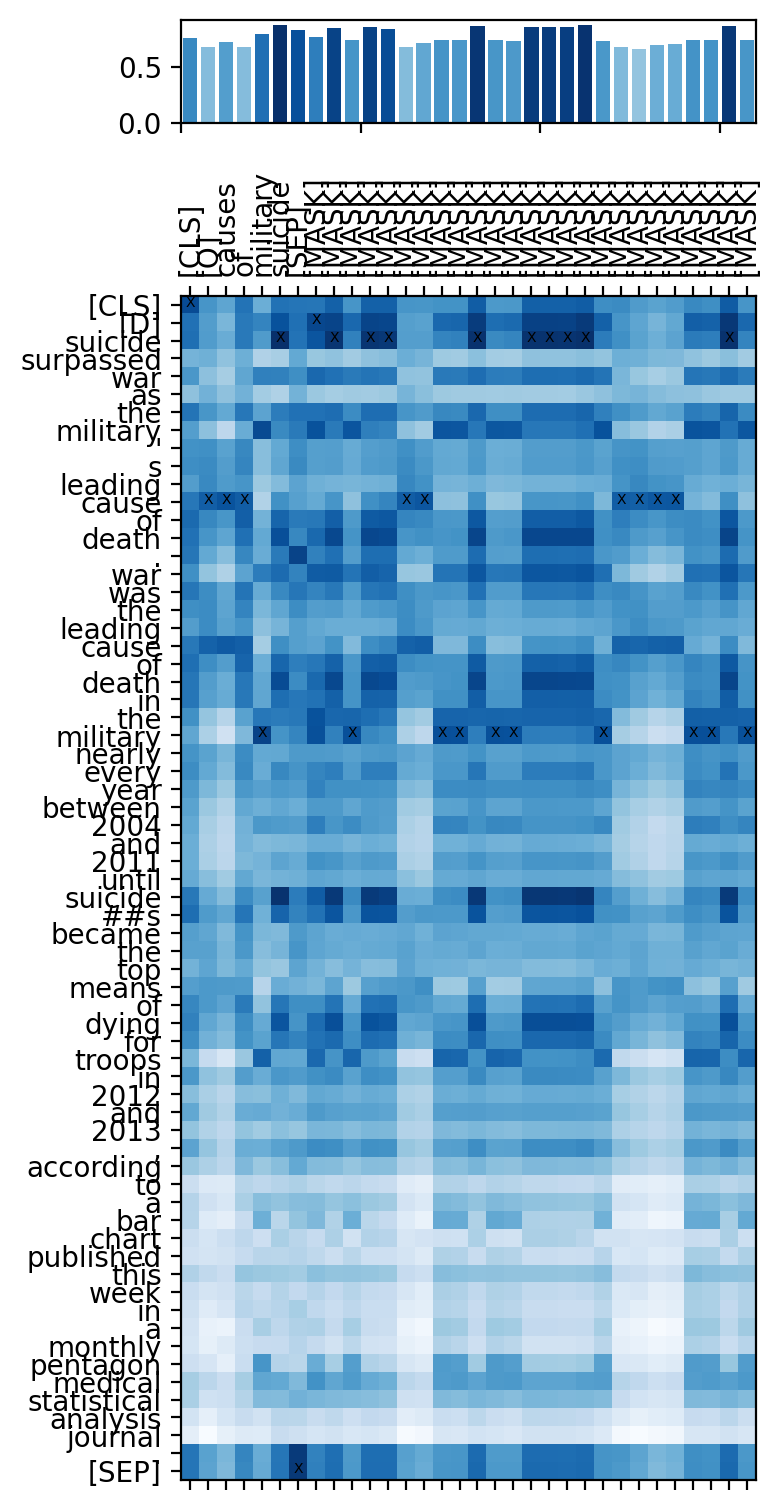

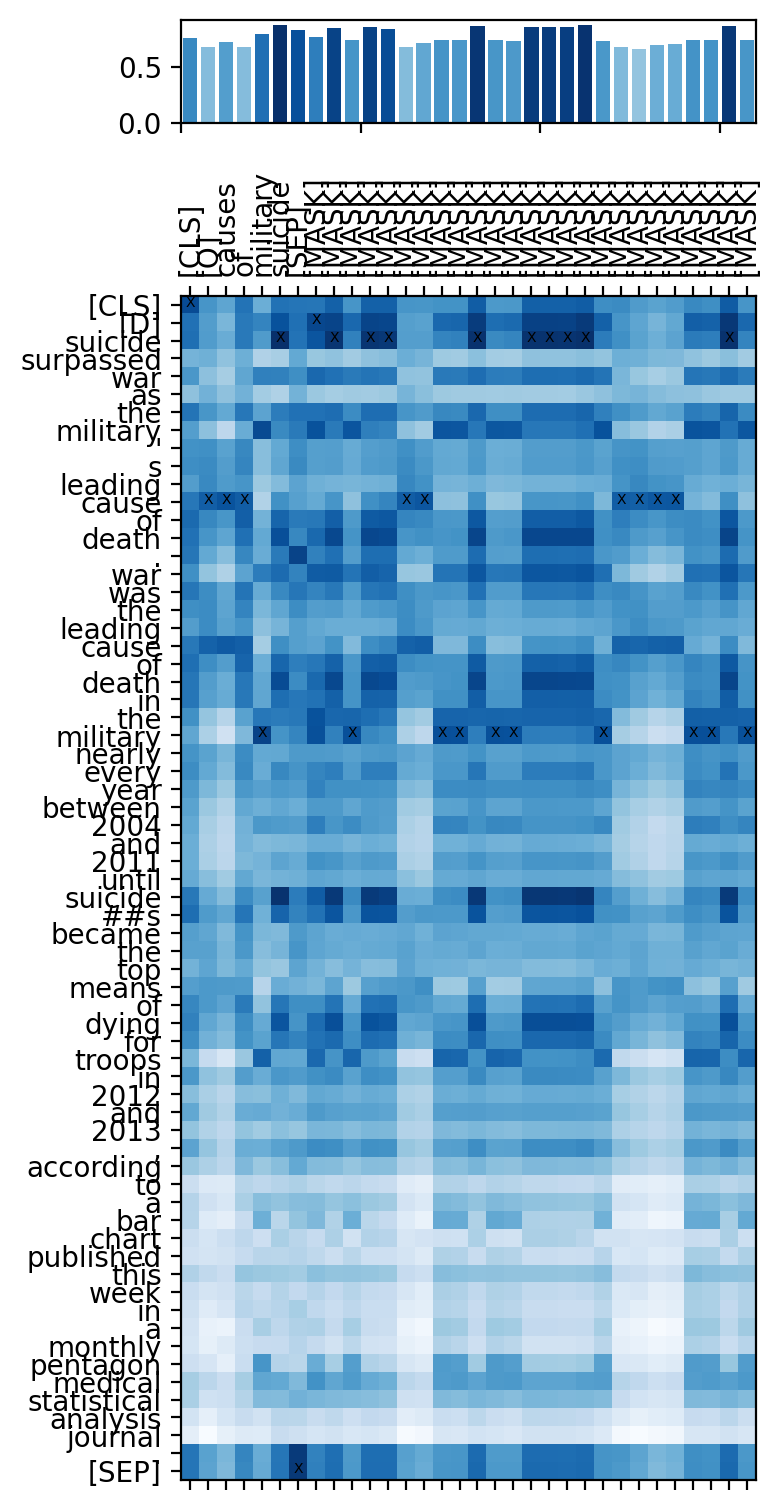

In [174]:
explain_text(craig_factory, query = query, document = ColCondenser_doc)

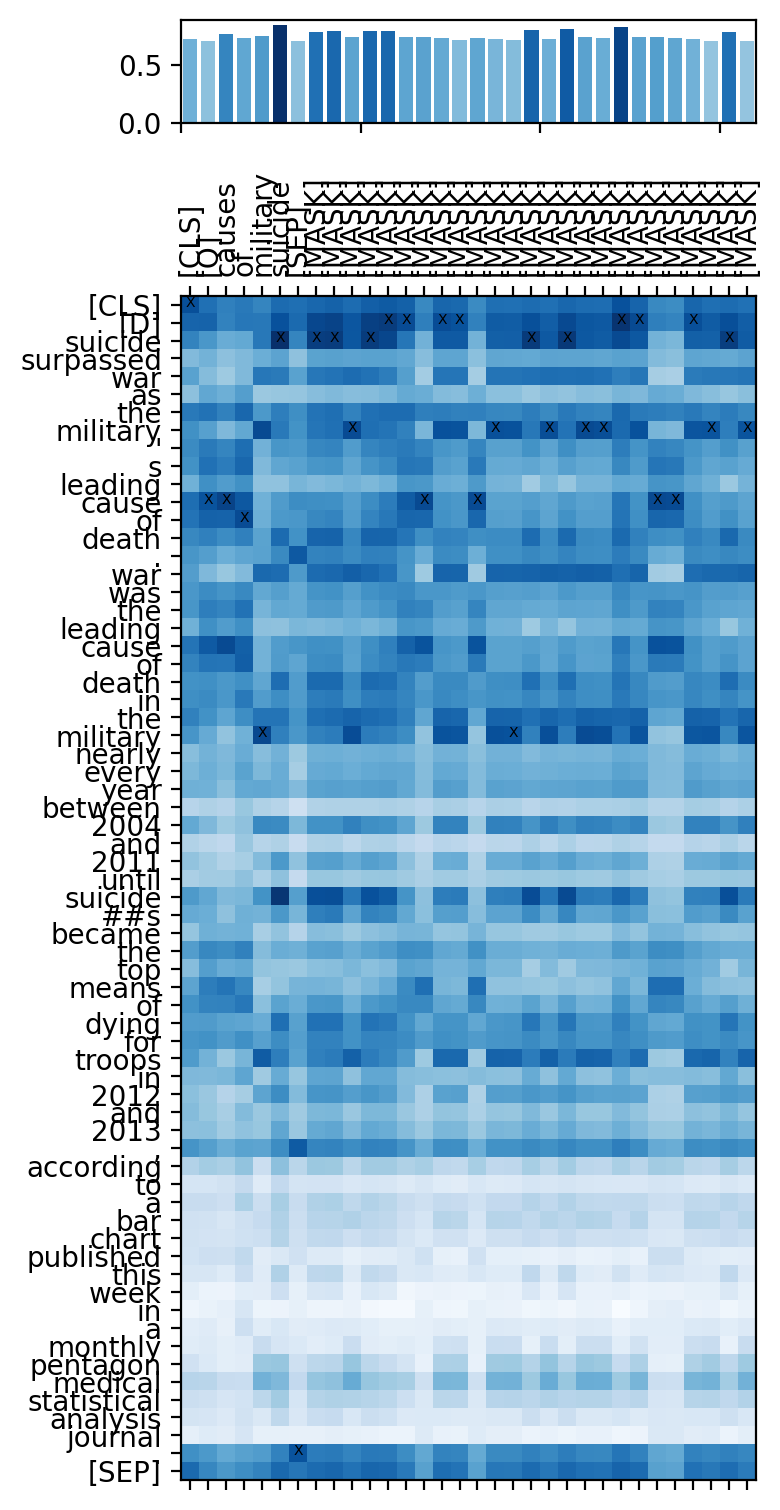

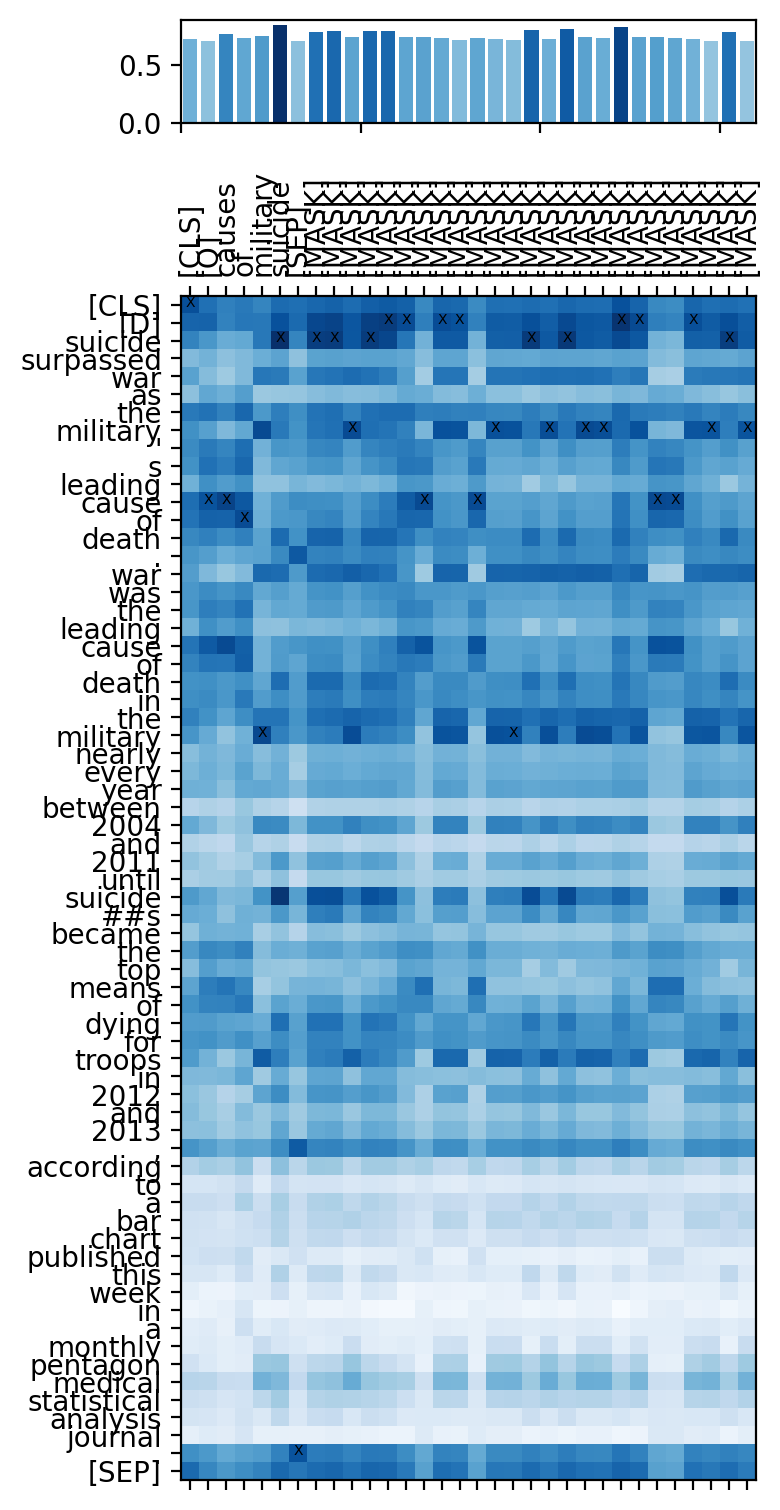

In [175]:
explain_text(colcondenser_50k_factory, query=query, document = ColCondenser_doc)

# **Per Query Effectiveness**


In [18]:
bs_df = pt.Experiment(
    [craig_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> Craig_ColBERT'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
)

In [19]:
token_df = pt.Experiment(
    [colcondenser_50k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> ColCondenser_50K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
) 

In [34]:
token_df = pt.Experiment(
    [colCondenser_Q_pruned],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> ColCondenser_50K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
) 

In [20]:
token_df = token_df[token_df['value'].notnull()]
bs_df = bs_df[bs_df['value'].notnull()]

In [36]:
bs_df["delta"] =  token_df["value"] - bs_df["value"]
bs_df.head(5)
#bs_df = bs_df[np.abs(bs_df["delta"]) > 0.02]

,name,qid,measure,value,delta
0,DPH >> Craig_ColBERT,1037798,nDCG@10,0.108904,-0.012456
1,DPH >> Craig_ColBERT,104861,nDCG@10,1.000000,0.000000
2,DPH >> Craig_ColBERT,1063750,nDCG@10,0.406745,-0.128336
3,DPH >> Craig_ColBERT,1103812,nDCG@10,0.783716,-0.098691
4,DPH >> Craig_ColBERT,1106007,nDCG@10,0.242096,0.000000


In [37]:
td_df = pt.get_dataset('msmarco_passage').get_topics('test-2019')
df3 = pd.merge(bs_df,td_df, how='left', on='qid')
sorted_df = df3.sort_values("delta", ascending=False)
sorted_df["qid:query"] = sorted_df["qid"] + ":" + sorted_df["query"]
sorted_df

,name,qid,measure,value,delta,query,qid:query
29,DPH >> Craig_ColBERT,405717,nDCG@10,0.619015,0.194586,is cdg airport in main paris,405717:is cdg airport in main paris
42,DPH >> Craig_ColBERT,962179,nDCG@10,0.535254,0.126346,when was the salvation army founded,962179:when was the salvation army founded
40,DPH >> Craig_ColBERT,87452,nDCG@10,0.416143,0.094550,causes of military suicide,87452:causes of military suicide
27,DPH >> Craig_ColBERT,264014,nDCG@10,0.821149,0.060107,how long is life cycle of flea,264014:how long is life cycle of flea
25,DPH >> Craig_ColBERT,19335,nDCG@10,0.297288,0.048272,anthropological definition of environment,19335:anthropological definition of environment
20,DPH >> Craig_ColBERT,148538,nDCG@10,0.408183,0.046193,difference between rn and bsn,148538:difference between rn and bsn
28,DPH >> Craig_ColBERT,359349,nDCG@10,0.780173,0.042446,how to find the midsegment of a trapezoid,359349:how to find the midsegment of a trapezoid
26,DPH >> Craig_ColBERT,207786,nDCG@10,0.548736,0.034214,how are some sharks warm blooded,207786:how are some sharks warm blooded
12,DPH >> Craig_ColBERT,1121402,nDCG@10,0.968190,0.031810,what can contour plowing reduce,1121402:what can contour plowing reduce
30,DPH >> Craig_ColBERT,443396,nDCG@10,0.283713,0.031168,lps laws definition,443396:lps laws definition


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

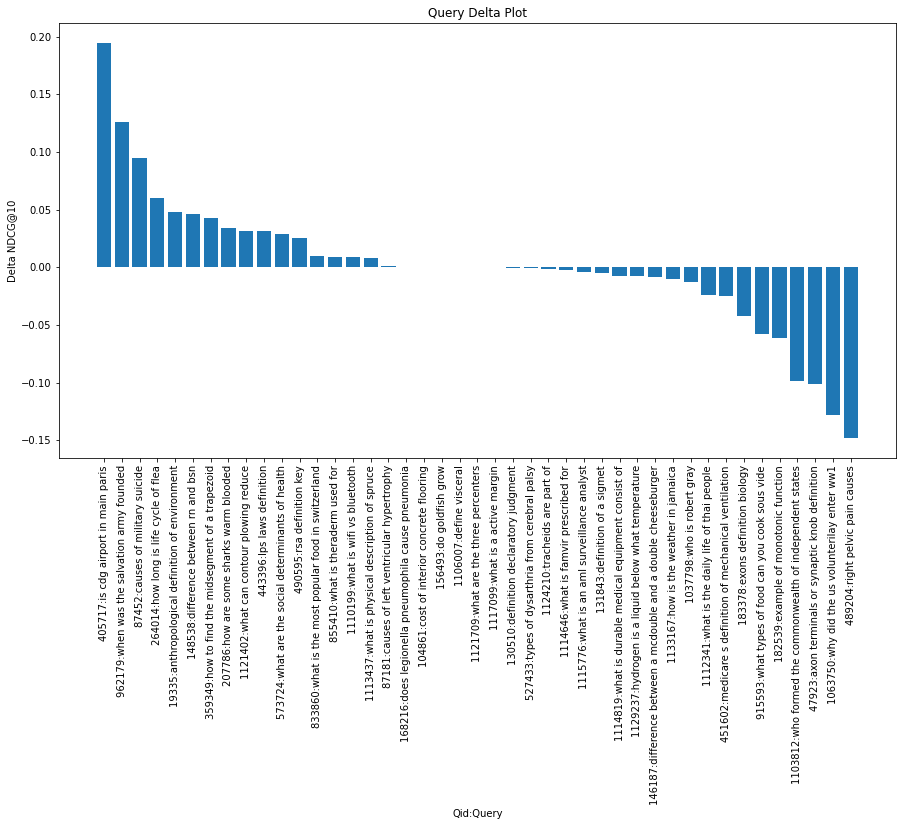

In [38]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.bar(sorted_df["qid:query"], sorted_df["delta"])
plt.title("Query Delta Plot")
plt.xlabel("Qid:Query")
plt.ylabel("Delta NDCG@10")
plt.xticks(rotation=90)

In [39]:
print("Improved Queries: ", sorted_df[sorted_df['delta']>0].count()[0])
print("Negative Impact Queries: ", sorted_df[sorted_df['delta']<0].count()[0])
print("Unchanged Queries: ", sorted_df[sorted_df['delta']==0].count()[0])

Improved Queries:  17
Negative Impact Queries:  20
Unchanged Queries:  6
